In [0]:
!wget https://www.dropbox.com/s/cacix53dhpo05mg/all_mias_scans.h5


--2019-07-30 12:00:42--  https://www.dropbox.com/s/cacix53dhpo05mg/all_mias_scans.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cacix53dhpo05mg/all_mias_scans.h5 [following]
--2019-07-30 12:00:42--  https://www.dropbox.com/s/raw/cacix53dhpo05mg/all_mias_scans.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8ce08d15f85dcf5116ac0d7a4.dl.dropboxusercontent.com/cd/0/inline/AlqgZ9N7Lbo0GCoTaKbDHSN9T_mubAyAehhuSc1c2fX1PWYJKRUGUr_gkY7SP4n0TBOfw-kk1BJ0veNGTg5oTk3mXXe1rSsx8l3mUTeO0i4bLQ/file# [following]
--2019-07-30 12:00:43--  https://ucd8ce08d15f85dcf5116ac0d7a4.dl.dropboxusercontent.com/cd/0/inline/AlqgZ9N7Lbo0GCoTaKbDHSN9T_mubAyAehhuSc1c2fX1PWYJKRUGUr_gkY7SP4n0TBOfw-kk1BJ0veNGTg5oTk3mXXe1rSsx8l3mUTeO0i4bLQ/file
R

In [0]:
!ls -al

total 102628
drwxr-xr-x 1 root root      4096 Jul 30 12:00 .
drwxr-xr-x 1 root root      4096 Jul 30 11:59 ..
-rw-r--r-- 1 root root 105073120 Jul 30 12:00 all_mias_scans.h5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 .config
drwxr-xr-x 1 root root      4096 Jul 19 16:14 sample_data


In [0]:
!wget https://www.dropbox.com/s/bcq1snyq4u15qnz/mammo_result_weights.best.floyd220120191700.hdf5

--2019-07-30 12:06:49--  https://www.dropbox.com/s/bcq1snyq4u15qnz/mammo_result_weights.best.floyd220120191700.hdf5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bcq1snyq4u15qnz/mammo_result_weights.best.floyd220120191700.hdf5 [following]
--2019-07-30 12:06:49--  https://www.dropbox.com/s/raw/bcq1snyq4u15qnz/mammo_result_weights.best.floyd220120191700.hdf5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc977ffaf8f5dabd6071d0aafe0f.dl.dropboxusercontent.com/cd/0/inline/Alrgw3cXYX9Ymp0VSXHSZTjct_7Y_7QnGwze5_WB2i95LcCu1auAZ-vtUeR6tu-BAloRL7FomrKBC-zxWf9oJPR6AWLFzDJDGFKyVyvfeWn29g/file# [following]
--2019-07-30 12:06:49--  https://uc977ffaf8f5dabd6071d0aafe0f.dl.dropboxusercontent.com/cd/0/inline/Alrgw3cXYX9Ymp0VSXHSZTjc

In [0]:
!mv mammo_result_weights.best.floyd220120191700.hdf5 mammo_result_weights.best.hdf5

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!ls -al


total 627240
drwxr-xr-x 1 root root      4096 Jul 30 12:07 .
drwxr-xr-x 1 root root      4096 Jul 30 11:59 ..
-rw-r--r-- 1 root root 105073120 Jul 30 12:00 all_mias_scans.h5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 .config
-rw-r--r-- 1 root root 537195972 Jul 30 12:07 mammo_result_weights.best.hdf5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 sample_data


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
import h5py
# not needed in Kaggle, but required in Jupyter
%matplotlib inline

In [0]:
base_h5 = os.path.join('all_mias_scans.h5')
tif_dir = 'tiffs'
os.makedirs(tif_dir, exist_ok=True)

with h5py.File(base_h5, 'r') as f:
    mammo_df = pd.DataFrame(
        {k: v.value if len(v.shape)==1 else [sub_v for sub_v in v] 
         for k,v in f.items()}
    )
for k in mammo_df.columns:
    if isinstance(mammo_df[k].values[0], bytes):
        mammo_df[k] = mammo_df[k].map(lambda x: x.decode())
# save data to disk
from skimage.io import imsave
def to_path(c_row):
    out_path = os.path.join(tif_dir, '%s.tif' % c_row['REFNUM'])
    imsave(out_path, c_row['scan'])
    return out_path
mammo_df['scan'] = mammo_df.apply(to_path,1)
mammo_df.sample(5)

,BG,CLASS,RADIUS,REFNUM,SEVERITY,X,Y,path,scan
39,D,NORM,NaN,mdb039,nan,NaN,NaN,mdb039.pgm,tiffs/mdb039.tif
299,G,NORM,NaN,mdb292,nan,NaN,NaN,mdb292.pgm,tiffs/mdb292.tif
50,G,NORM,NaN,mdb050,nan,NaN,NaN,mdb050.pgm,tiffs/mdb050.tif
261,D,NORM,NaN,mdb254,nan,NaN,NaN,mdb254.pgm,tiffs/mdb254.tif
302,D,NORM,NaN,mdb295,nan,NaN,NaN,mdb295.pgm,tiffs/mdb295.tif


Using TensorFlow backend.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd67d4b1668>,
      dtype=object)

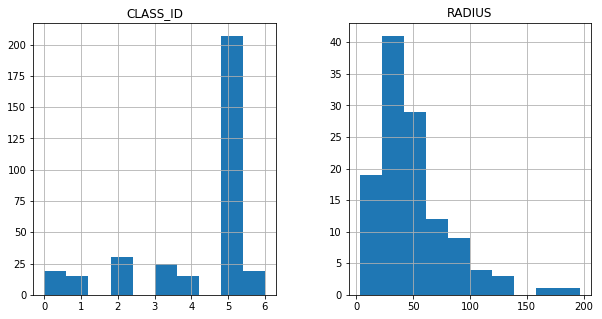

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
class_enc = LabelEncoder()
mammo_df['CLASS_ID'] = class_enc.fit_transform(mammo_df['CLASS'])
mammo_df['CLASS_VEC'] = mammo_df['CLASS_ID'].map(lambda x: to_categorical(x, 
                                                                          num_classes=len(class_enc.classes_)))
mammo_df['SEVERITY_ID'] = class_enc.fit_transform(mammo_df['SEVERITY'])
mammo_df['SEVERITY_VEC'] = mammo_df['SEVERITY_ID'].map(lambda x: to_categorical(x, 
                                                                          num_classes=len(class_enc.classes_)))
mammo_df[['CLASS_ID', 'RADIUS', 'SEVERITY']].hist(figsize = (10, 5))

In [0]:
mammo_df.shape

(330, 13)

In [0]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(mammo_df, 
                                   test_size = 0.25, 
                                   random_state = 2019,
                                   stratify = mammo_df[['CLASS_ID', 'SEVERITY']])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
raw_train_df.sample(1)


train 247 validation 83


,BG,CLASS,RADIUS,REFNUM,SEVERITY,X,Y,path,scan,CLASS_ID,CLASS_VEC,SEVERITY_ID,SEVERITY_VEC
126,D,ARCH,23.0,mdb126,B,191.0,549.0,mdb126.pgm,tiffs/mdb126.tif,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,"[1.0, 0.0, 0.0]"


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
IMG_SIZE = (192, 192) # slightly smaller than vgg16 normally expects
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.2,
                             preprocessing_function = preprocess_input)

New Data Size: 1300 Old Size: 247


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd67a774208>]],
      dtype=object)

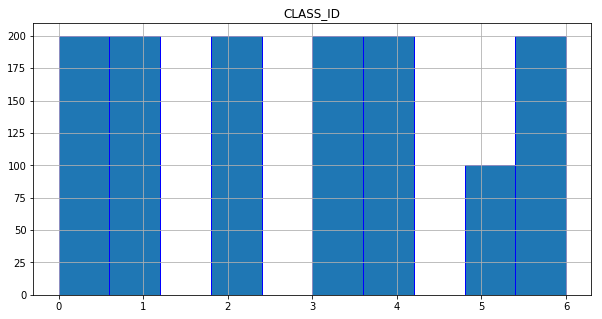

In [0]:
train_df = raw_train_df.groupby(['CLASS', 'SEVERITY']).apply(lambda x: x.sample(100, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
train_df[['CLASS_ID', 'SEVERITY']].hist(figsize = (10, 5),edgeColor='blue')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52c030dd8>]],
      dtype=object)

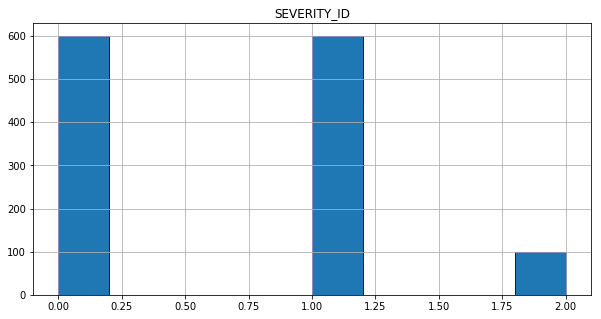

In [0]:
train_df[['SEVERITY_ID']].hist(figsize = (10, 5),edgeColor='blue')

In [0]:
!ls -al

total 627252
drwxr-xr-x 1 root root      4096 Jul 30 12:11 .
drwxr-xr-x 1 root root      4096 Jul 30 11:59 ..
-rw-r--r-- 1 root root 105073120 Jul 30 12:00 all_mias_scans.h5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 .config
-rw-r--r-- 1 root root 537195972 Jul 30 12:07 mammo_result_weights.best.hdf5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 sample_data
drwxr-xr-x 2 root root     12288 Jul 30 12:14 tiffs


In [0]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [0]:
"""

En estas lineas, defino cada uno de los data generator para los splits del dataset.
Cada data generator toma datos desde el dataframe train_df  y desde el directorio tiffs/ toma las imagenes que ya fueron descomprimidas.

"""
train_gen = core_idg.flow_from_dataframe(
                                      dataframe=train_df,
                                      directory="",
                                      x_col="scan",
                                      y_col="SEVERITY",
                                      batch_size=32,
                                      seed=42,
                                      shuffle=True,
                                      class_mode="categorical",
                                      target_size=IMG_SIZE)

valid_gen=core_idg.flow_from_dataframe(
                                      dataframe=valid_df,
                                      directory="",
                                      x_col="scan",
                                      y_col="SEVERITY",
                                      batch_size=256,
                                      seed=42,
                                      shuffle=True,
                                      class_mode="categorical",
                                      target_size=IMG_SIZE)

test_gen=core_idg.flow_from_dataframe(
                                      dataframe=valid_df,
                                      directory="",
                                      x_col="scan",
                                      y_col="SEVERITY",
                                      batch_size=1024,
                                      seed=42,
                                      shuffle=True,
                                      class_mode="categorical",
                                      target_size=IMG_SIZE)

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=valid_gen.n//valid_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size

"""train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="./train/",
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="./train/",
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))


valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'scan',
                            y_col = 'SEVERITY_VEC', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation

# used a fixed dataset for evaluating the algorithm
test_gen =  flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'scan',
                            y_col = 'SEVERITY_VEC', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1024) # one big batch """

Found 1300 validated image filenames belonging to 3 classes.
Found 83 validated image filenames belonging to 3 classes.
Found 83 validated image filenames belonging to 3 classes.


'train_generator=datagen.flow_from_dataframe(\ndataframe=traindf,\ndirectory="./train/",\nx_col="id",\ny_col="label",\nsubset="training",\nbatch_size=32,\nseed=42,\nshuffle=True,\nclass_mode="categorical",\ntarget_size=(32,32))\n\ntrain_generator=datagen.flow_from_dataframe(\ndataframe=traindf,\ndirectory="./train/",\nx_col="id",\ny_col="label",\nsubset="training",\nbatch_size=32,\nseed=42,\nshuffle=True,\nclass_mode="categorical",\ntarget_size=(32,32))\n\n\nvalid_gen = flow_from_dataframe(core_idg, valid_df, \n                             path_col = \'scan\',\n                            y_col = \'SEVERITY_VEC\', \n                            target_size = IMG_SIZE,\n                             color_mode = \'rgb\',\n                            batch_size = 256) # we can use much larger batches for evaluation\n\n# used a fixed dataset for evaluating the algorithm\ntest_gen =  flow_from_dataframe(core_idg, \n                               valid_df, \n                             path_

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras import Sequential
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Create your own input format (here 3x200x200)
input = Input(shape=(192,192,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(3, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()


#Then training with your data ! 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`


In [0]:
from keras.optimizers import SGD


my_model.compile(loss = "categorical_crossentropy", 
                    optimizer = SGD(lr=1e-5, momentum=0.9), 
                    metrics=["categorical_accuracy"])
#Agregado por mi
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('mammo_result_severity')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [0]:
my_model.load_weights('mammo_result_severity_weights.best.hdf5')

history = my_model.fit_generator(train_gen, 
                                  steps_per_epoch = STEP_SIZE_TRAIN,
                                  validation_data = valid_gen, 
                                  nb_val_samples = 250,
                                  epochs = 10, 
                                  callbacks = callbacks_list)

"""my_model.fit_generator(generator=train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks = callbacks_list)"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=40, validation_data=<keras_pre..., epochs=10, callbacks=[<keras.ca..., validation_steps=250)`
  


Epoch 1/10
18/40 [============>.................] - ETA: 10s - loss: 0.4134 - categorical_accuracy: 0.8479

KeyboardInterrupt: ignored

In [0]:
"""Estas lineas me permiten conectar mi notebook con mi unidad de GoogleDrive"""
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
"""Con esta linea estoy copiando el mejor resultado del entrenamiento del modelo a mi unidad de google drive"""
!cp mammo_result_severity_weights.best.hdf5 drive/My\ Drive


In [0]:
!ls -al 

total 1045304
drwxr-xr-x 1 root root      4096 Jul 30 14:31 .
drwxr-xr-x 1 root root      4096 Jul 30 11:59 ..
-rw-r--r-- 1 root root 105073120 Jul 30 12:00 all_mias_scans.h5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 .config
drwx------ 3 root root      4096 Jul 30 14:31 drive
-rw-r--r-- 1 root root 428078572 Jul 30 14:07 mammo_result_severity_weights.best.hdf5
-rw-r--r-- 1 root root 537195972 Jul 30 12:07 mammo_result_weights.best.hdf5
drwxr-xr-x 1 root root      4096 Jul 19 16:14 sample_data
drwxr-xr-x 2 root root     12288 Jul 30 12:14 tiffs


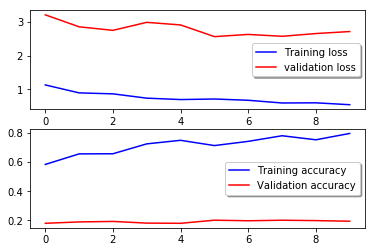

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [0]:
test_gen.reset()
pred=my_model.predict_generator(test_gen,
steps=STEP_SIZE_TEST,
verbose=1)

83/83 [==============================] - 1s 13ms/step


In [0]:
pred_Y = my_model.predict(test_X, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y,-1)
test_Y_cat = np.argmax(test_Y, -1)

              precision    recall  f1-score   support

        ARCH       0.00      0.00      0.00         5
        ASYM       0.00      0.00      0.00         3
        CALC       0.27      0.38      0.32         8
        CIRC       0.50      0.50      0.50         6
        MISC       0.33      0.50      0.40         4
        NORM       0.68      0.69      0.69        52
        SPIC       0.33      0.20      0.25         5

   micro avg       0.54      0.54      0.54        83
   macro avg       0.30      0.32      0.31        83
weighted avg       0.52      0.54      0.53        83



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


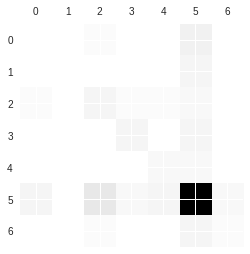

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(test_Y_cat, pred_Y_cat))
print(classification_report(test_Y_cat, pred_Y_cat, target_names = class_enc.classes_))

In [0]:
!ls -al 


total 1779108
drwxr-xr-x 1 root root      4096 Jan 24 19:26 .
drwxr-xr-x 1 root root      4096 Jan 24 12:59 ..
-rw-r--r-- 1 root root      2511 Jan 24 19:26 adc.json
-rw-r--r-- 1 root root 105073120 Jan 24 13:00 all_mias_scans.h5
-rw-r--r-- 1 root root 105073120 Jan 24 13:03 all_mias_scans.h5.1
drwxr-xr-x 1 root root      4096 Jan 24 19:26 .config
-rw-r--r-- 1 root root 537195972 Jan 24 17:38 mammo_result_weights.best.hdf5
-rw-r--r-- 1 root root 537195972 Jan 24 15:11 model_weights.h5
-rw-r--r-- 1 root root 537195972 Jan 24 19:07 model_weights_last_trainning.hdf5
drwxr-xr-x 1 root root      4096 Jan  8 17:15 sample_data
drwxr-xr-x 2 root root     12288 Jan 24 13:04 tiffs
